In [1]:
import math
import statistics

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm

In [2]:
df = pd.read_csv("data/nyc-rolling-sales.csv")

print (df.head(5))

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

In [3]:
print(df.tail())

       Unnamed: 0  BOROUGH NEIGHBORHOOD  \
84543        8409        5      WOODROW   
84544        8410        5      WOODROW   
84545        8411        5      WOODROW   
84546        8412        5      WOODROW   
84547        8413        5      WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
84543  02 TWO FAMILY DWELLINGS                                        1   
84544  02 TWO FAMILY DWELLINGS                                        1   
84545  02 TWO FAMILY DWELLINGS                                        1   
84546  22 STORE BUILDINGS                                             4   
84547  35 INDOOR PUBLIC AND CULTURAL FACILITIES                       4   

       BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT                ADDRESS  \
84543   7349   34                                  B9          37 QUAIL LANE   
84544   7349   78                                  B9       32 PHEASANT LANE   
84545   7351   60                                 

In [4]:
borough = pd.Series(
    [1, 2, 3, 4, 5],
    index=["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"],
    name="BOROUGH",
)
print(borough)

Manhattan        1
Bronx            2
Brooklyn         3
Queens           4
Staten Island    5
Name: BOROUGH, dtype: int64


In [5]:
df.shape

(84548, 22)

In [6]:
df.drop(columns=["Unnamed: 0", "EASE-MENT"], inplace=True)

In [7]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [9]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [10]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [12]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [13]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [14]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [15]:
print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [16]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


In [17]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

In [18]:
df[df['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


- There are zip codes with 0 value
- Year column has a year with 0
- Maximal of Block is 16317

In [19]:
x = df["BOROUGH"].value_counts()
x

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

In [20]:
stats_mean = statistics.mean(x)
print("mean of borough:", stats_mean)

mean of borough: 16756.6


In [21]:
stats_median = statistics.median(x)
print("median of borough:", stats_median)

median of borough: 18102


In [22]:
stats_mode = statistics.mode(x)
print("mode of borough:", stats_mode)

mode of borough: 26548


In [23]:
stats_var = statistics.variance(x)
print("variance of borough:", stats_var)

variance of borough: 78697197.8


In [24]:
stats_range = np.ptp(x)
print("range of borough:", stats_range)

range of borough: 19554


In [25]:
stats_sdv = statistics.stdev(x)
print("standard deviation of borough:", stats_sdv)

standard deviation of borough: 8871.144108850898


Asumsi: data  terdistribusi normal

[-0.27902009 -0.6000287   2.24296528 ...  0.86767897 -2.20037731
 -0.69260277]


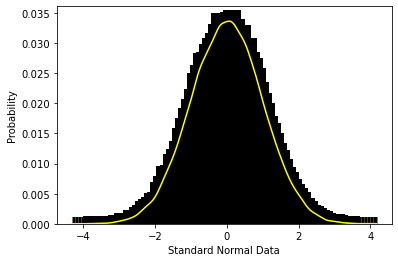

In [26]:
# Normal Distribution

data_normal = norm.rvs(size=84548, loc=0, scale=1)
print(data_normal)

sns.histplot(
    x=data_normal, stat="probability", bins=100, kde=True, color="yellow",
    alpha=1, linewidth=15
)
plt.xlabel("Standard Normal Data")
plt.ylabel("Probability")
plt.show()

In [27]:
df["BOROUGH"] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})
dx = df[["BOROUGH", "TOTAL UNITS"]].dropna()
dx

,BOROUGH,TOTAL UNITS
0,Manhattan,5
1,Manhattan,31
2,Manhattan,17
3,Manhattan,10
4,Manhattan,6
...,...,...
84543,Staten Island,2
84544,Staten Island,2
84545,Staten Island,2
84546,Staten Island,7


In [28]:
dx.rename(columns={"TOTAL UNITS": "Units"}, inplace=True)
dx

,BOROUGH,Units
0,Manhattan,5
1,Manhattan,31
2,Manhattan,17
3,Manhattan,10
4,Manhattan,6
...,...,...
84543,Staten Island,2
84544,Staten Island,2
84545,Staten Island,2
84546,Staten Island,7


In [29]:
pd.crosstab(dx.BOROUGH, dx.Units).head(5)

Units,0,1,2,3,4,5,6,7,8,9,...,551,680,736,771,889,902,955,1653,1866,2261
BOROUGH,,,,,,,,,,,,,,,,,,,,,
Bronx,1442,2171,1939,818,189,39,50,26,35,21,...,0,1,2,0,0,0,1,0,0,0
Brooklyn,3690,9384,5857,2694,820,205,489,75,227,48,...,0,0,0,0,1,0,0,0,0,0
Manhattan,8061,8595,191,129,127,59,54,50,70,45,...,1,0,0,3,0,1,0,1,0,0
Queens,5936,12276,5793,1606,304,104,255,39,26,23,...,0,0,0,0,0,0,0,0,2,1
Staten Island,548,5588,1965,114,47,6,5,2,5,3,...,0,0,0,0,0,0,0,0,0,0


In [30]:
total_0 = 1442 + 3690 + 8061 + 5936 + 548
prop_0 = 8061 / total_0 #manhattan
print("total_0:", total_0)
print("prop_0:", prop_0)

total_0: 19677
prop_0: 0.40966610763835953


In [31]:
sm.stats.proportion_confint(total_0 * prop_0, total_0)

(0.40279490866503687, 0.4165373066116822)

Hypothesis: sebesar 40% orang di Borough lebih banyak membeli rumah di Manhattan daripada di Borough lainnya
H0 = 40%
H1> 40%

In [32]:
n  = 84548
pnull = 0.40
palt = 0.60

sm.stats.proportions_ztest(palt * n, n, pnull, alternative="larger")

(118.70692201103239, 0.0)

## Kesimpulan 
nilai p value = 0.00 < 0.05, sehingga Reject H0. Berarti sebesar 60% penduduk di seluruh NYC yang membeli rumah di Manhattan